<font color=#010190 size = 8> Car Insurance price prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import unicodedata
import seaborn as sns
import datetime

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

<font color=#010190 size = 5> Data understanding

In [2]:
dfassu = pd.read_csv("baseautoAssurance.csv")
dfassu.head(5)

,name,selling_price,year,km_driven,carrosserie,engine,fuel,seats,transmission,prix_assuran,type_ass
0,Mini 3 portes,"63,500",2016,61000,Coupé,4,Essence,5,Manuel,979336,routiere+options
1,Renault Laguna,"64,500",2011,"150,000",Berline,6,Diesel,5,Manuel,1053486,routiere+options
2,Volkswagen Golf 7,"65,500",2016,"72,000",Utilitaire,5,Essence,5,Manuel,1059209,routiere+options
3,Mercedes-Benz 200,"66,500",2003,"230,000",Berline,10,Essence,5,Manuel,1133332,routiere+options
4,Toyota GT86,"67,500",2014,"49,000",Utilitaire,12,Essence,5,Manuel,1509536,dommage et collision


In [3]:
dfassu.describe(include = 'all')

,name,selling_price,year,km_driven,carrosserie,engine,fuel,seats,transmission,prix_assuran,type_ass
count,184,184,184.000000,184,184,184.000000,184,184.0,184,1.840000e+02,184
unique,100,184,NaN,109,10,NaN,2,NaN,2,NaN,3
top,Volkswagen Golf 7,"63,500",NaN,"150,000",Berline,NaN,Essence,NaN,Automatic,NaN,tout risque
freq,8,1,NaN,9,48,NaN,143,NaN,113,NaN,93
mean,NaN,NaN,2014.195652,NaN,NaN,9.038043,NaN,5.0,NaN,5.389384e+06,NaN
std,NaN,NaN,3.838941,NaN,NaN,5.855609,NaN,0.0,NaN,5.184291e+06,NaN
min,NaN,NaN,1997.000000,NaN,NaN,4.000000,NaN,5.0,NaN,9.793360e+05,NaN
25%,NaN,NaN,2012.000000,NaN,NaN,5.000000,NaN,5.0,NaN,2.293975e+06,NaN
50%,NaN,NaN,2015.000000,NaN,NaN,7.000000,NaN,5.0,NaN,4.691185e+06,NaN
75%,NaN,NaN,2017.000000,NaN,NaN,10.000000,NaN,5.0,NaN,6.635408e+06,NaN


In [4]:
dfassu.isna().sum()

name             0
selling_price    0
year             0
km_driven        0
carrosserie      0
engine           0
fuel             0
seats            0
transmission     0
prix_assuran     0
type_ass         0
dtype: int64

In [5]:
dfassu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           184 non-null    object
 1   selling_price  184 non-null    object
 2   year           184 non-null    int64 
 3   km_driven      184 non-null    object
 4   carrosserie    184 non-null    object
 5   engine         184 non-null    int64 
 6   fuel           184 non-null    object
 7   seats          184 non-null    int64 
 8   transmission   184 non-null    object
 9   prix_assuran   184 non-null    int64 
 10  type_ass       184 non-null    object
dtypes: int64(4), object(7)
memory usage: 15.9+ KB


In [6]:
dfassu['fuel'].unique()

array(['Essence', 'Diesel'], dtype=object)

In [7]:
dfassu['type_ass'].unique()

array(['routiere+options', 'dommage et collision', 'tout risque'],
      dtype=object)

Text(0, 0.5, 'Count of cars')

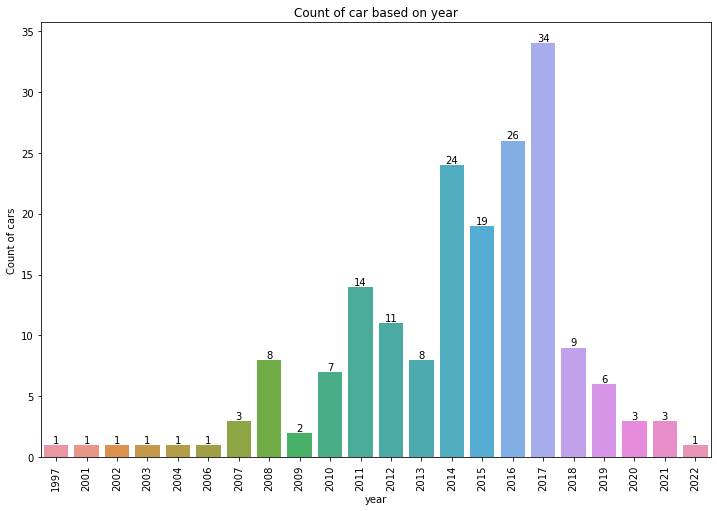

In [8]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'year', data = dfassu)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of car based on year")
plt.xlabel("year")
plt.ylabel("Count of cars")

Text(0, 0.5, 'Count of cars')

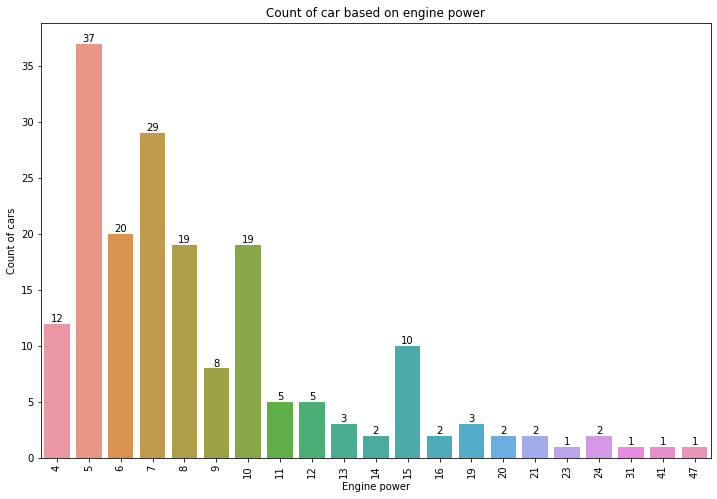

In [9]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'engine', data = dfassu)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of car based on engine power")
plt.xlabel("Engine power")
plt.ylabel("Count of cars")

Text(0, 0.5, 'Count of cars')

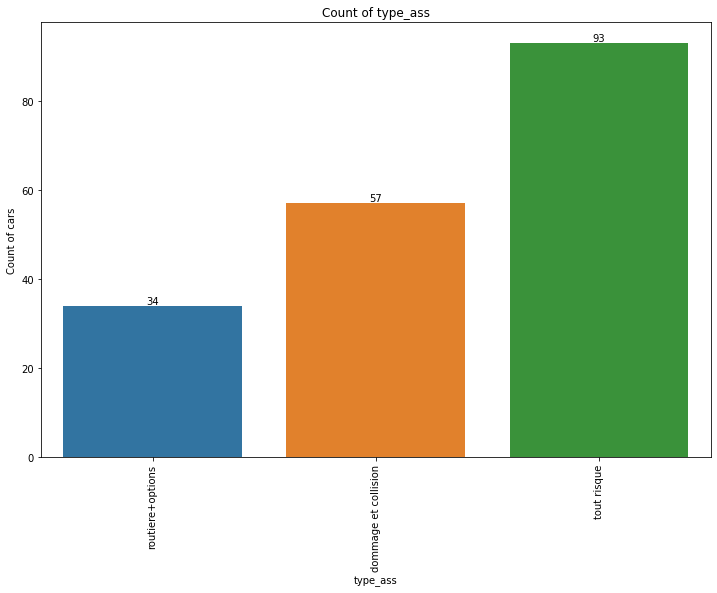

In [10]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'type_ass', data = dfassu)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of type_ass")
plt.xlabel("type_ass")
plt.ylabel("Count of cars")

<font color=#010190 size = 4> In order to change the feature 'Type_ass' from object to integer, we managed to classify the string values

In [11]:
dfassu['type_ass'] = dfassu['type_ass'].map({'routiere+options': 0, 'dommage et collision': 1,'tout risque': 2 })

In [12]:
dfassu=dfassu.drop(['fuel','name','km_driven','carrosserie','seats','transmission'],axis=1)

<font color=#010190 size = 4> Based on our reasearch, the 'fuel', 'name', 'km_driven', 'carrosserie', 'seats' and 'transmission' are not taken into consideration while calculating the insurance price, that's why we dropped them.

In [13]:
curr_time = datetime.datetime.now()
dfassu['age'] = dfassu['year'].apply(lambda x : curr_time.year - x)

In [14]:
def toFloat(x):
    i = int(x.replace(',', ''))
    return i

dfassu['selling_price'] = dfassu['selling_price'].map(lambda x: toFloat(x))

In [15]:
dfassu.head()

,selling_price,year,engine,prix_assuran,type_ass,age
0,63500,2016,4,979336,0,6
1,64500,2011,6,1053486,0,11
2,65500,2016,5,1059209,0,6
3,66500,2003,10,1133332,0,19
4,67500,2014,12,1509536,1,8


In [16]:
dfassu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   selling_price  184 non-null    int64
 1   year           184 non-null    int64
 2   engine         184 non-null    int64
 3   prix_assuran   184 non-null    int64
 4   type_ass       184 non-null    int64
 5   age            184 non-null    int64
dtypes: int64(6)
memory usage: 8.8 KB


<AxesSubplot:>

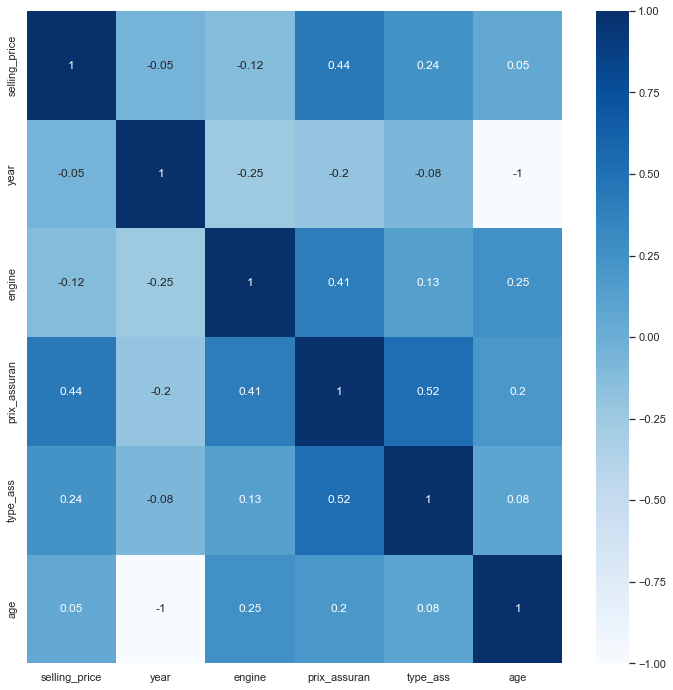

In [17]:
f = plt.figure(figsize=(12, 12))
sns.set()
sns.heatmap(dfassu.corr().round(2), annot=True, cmap="Blues")

<font color=#010190 size = 4> We noticed that we have a strong correlation between 'type_ass' and 'Prix_assuran' features, 'selling_price' and 'type_ass' features
    
 <font color=#010190 size = 4> Every other thing seems uncorrelated.

Text(0.5, 1.0, 'Insurance price and engine')

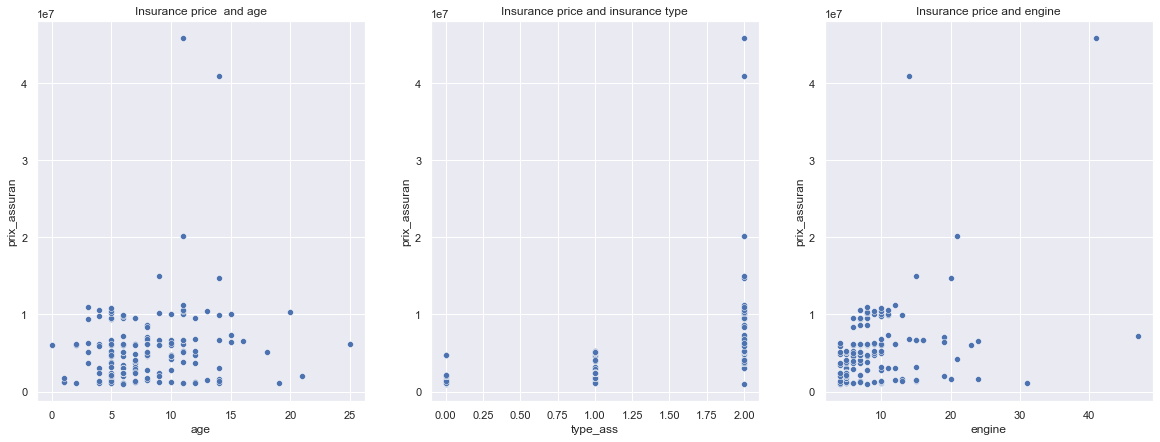

In [18]:
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Insurance price  and age")
sns.scatterplot(x='age',y='prix_assuran',data=dfassu)

plt.subplot(1,3,2)
plt.title("Insurance price and insurance type")
sns.scatterplot(y='prix_assuran',x='type_ass',data=dfassu)

plt.subplot(1,3,3)
sns.scatterplot(y='prix_assuran',x='engine',data=dfassu)
plt.title("Insurance price and engine")

<font color=#010190 size = 4> In the first plot, we notice that the insurance price and the age of the car are positively correlated
    
 <font color=#010190 size = 4> In the second plot, we noticed that the 'Tout risque' insurance type is the most expensive
     
 <font color=#010190 size = 4> In the third plot, we noticed that the price increase when the engine power is high

 <font color=#010190 size = 6> Model training

In [19]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [20]:
X = dfassu.drop(['prix_assuran','year'],axis=1).copy()
y = dfassu['prix_assuran'].values.copy() 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [22]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

 <font color=#010190 size = 4> We chose the 3 models 'Linear Regression', 'Random Forest Regressor' and 'Gradient Boosting Regressor' because they are the most efficient ones with a small dataset

In [23]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn import ensemble
models=[]

LR=LinearRegression().fit(X_train,y_train)
models.append(LR)
RFR=ensemble.RandomForestRegressor().fit(X_train,y_train)
models.append(RFR)

GBT=ensemble.GradientBoostingRegressor().fit(X_train,y_train)
models.append(GBT)


In [24]:
from sklearn import metrics
def evaluations(model,X_test,y_test):
    
    scores=metrics.r2_score(y_test,model.predict(X_test))
    mse=metrics.mean_squared_error(y_test, model.predict(X_test))
    mae=metrics.median_absolute_error(y_test, model.predict(X_test))
    rmse=metrics.mean_squared_error(y_test, model.predict(X_test))
    print('Model: ',model)
    print('Rsquared: ', scores)
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('**************************')

In [25]:
for model in models:
    evaluations(model,X_test,y_test)

Model:  LinearRegression()
Rsquared:  0.5983215251302857
MAE:  1252257.6303349677
MSE:  3650309935835.5015
RMSE:  3650309935835.5015
**************************
Model:  RandomForestRegressor()
Rsquared:  0.8506711913496169
MAE:  135279.31999999983
MSE:  1357046663005.2197
RMSE:  1357046663005.2197
**************************
Model:  GradientBoostingRegressor()
Rsquared:  0.9496027418908247
MAE:  250155.13432976464
MSE:  457992209003.6279
RMSE:  457992209003.6279
**************************


<font color=#010190 size = 4> Both Random Forest Regressor and Gradient Bosst Regressor have the best R squerred, so we chose these two models to work with.

In [28]:
X1 = dfassu.drop(['type_ass','year'],axis=1).copy()
y1 = dfassu['type_ass'].values.copy() 

In [29]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20)

<font color=#010190 size = 4> Data standardization

In [30]:
standardScaler.fit(X1_train)
X1_train = standardScaler.transform(X1_train)
X1_test = standardScaler.transform(X1_test)

In [32]:
print(dfassu.groupby('type_ass').size())

type_ass
0    34
1    57
2    93
dtype: int64


<font color=#010190 size = 8> Car Insurance type prediction

<font color=#010190 size = 4> using the KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
#Next, we need to train the model. In order to train our new model, we will use the ‘fit’ function and pass in our training data as 
#parameters to fit our model to the training data.
# Fit the classifier to the data
knn.fit(X1_train,y1_train)

KNeighborsClassifier()

In [39]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report

def evaluation_std(model):
    from sklearn.metrics import plot_confusion_matrix
    model.fit(X1_train, y1_train)
    ypred = model.predict(X1_test)    
    plot_confusion_matrix(model, X1_test, y1_test,display_labels=dfassu.type_ass.unique(),cmap=plt.cm.Blues)
    print(classification_report(y1_test, ypred)) 

In [41]:
y_pred_knn = knn.predict(X1_test)


              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.62      0.67      0.64        12
           2       0.88      0.93      0.90        15

    accuracy                           0.76        37
   macro avg       0.75      0.73      0.74        37
weighted avg       0.76      0.76      0.75        37



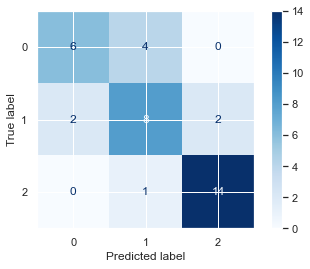

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
accuracies= []
report = classification_report(y1_test, y_pred_knn, output_dict=True)
accuracies.append(report['accuracy'])
evaluation_std(knn)

0 : routiere

1 : dommage et collision

2 : tout risque 

<font color=#010190 size = 4> Testing the model

In [44]:
features = np.array([[63500,4,1268257.97062301,6]])
prediction = knn.predict(standardScaler.transform(features))

print("Prediction: {}".format(prediction))

Prediction: [0]
